# Brain Age Prediction Ridge

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:
from sklearn.linear_model import Ridge
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical

class RidgeRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Ridge"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Ridge
        if params is None:
            self.params = {
                'alpha': 1.0,
                'solver': 'auto'
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(1e-3, 10.0, prior='log-uniform'),
                #'solver': Categorical(['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'])
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = RidgeRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'skyblue'
nameset = 'Ridge'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [10]:
with open(f'results_model/opt_model.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [6]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

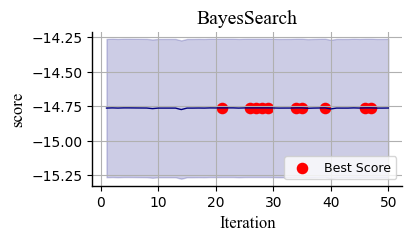

Top 1: Iteration 46, Score -14.76279843533221
Top 2: Iteration 47, Score -14.762800994658857
Top 3: Iteration 27, Score -14.76280263349447
Top 4: Iteration 35, Score -14.762804017335279
Top 5: Iteration 29, Score -14.762806192730753
Top 6: Iteration 39, Score -14.7628063980333
Top 7: Iteration 34, Score -14.762806612960452
Top 8: Iteration 28, Score -14.762809630940406
Top 9: Iteration 21, Score -14.762813445150408
Top 10: Iteration 26, Score -14.762813743123155


In [7]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [8]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 1.965133838931298},
 {'alpha': 1.9510774390481342},
 {'alpha': 1.9418194213876925},
 {'alpha': 1.9338321055643657},
 {'alpha': 1.920934869405912},
 {'alpha': 1.9196947890865514},
 {'alpha': 1.9183921517437856},
 {'alpha': 1.899592370787853},
 {'alpha': 1.874275309072285},
 {'alpha': 1.8722128617904366}]

In [9]:
best_params=opt_model.best_params_

# Training

In [14]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [15]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [16]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [10]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

In [12]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar las métricas de cada fold
mae_list = []
mae_corrected_list = []
r2_list = []
r2_corrected_list = []

# Iterar sobre cada DataFrame en la lista
for df in results_per_fold_CN_test:
    # Calcular MAE y R2 para y_pred
    mae = mean_absolute_error(df['y_labels'], df['y_pred'])
    r2 = r2_score(df['y_labels'], df['y_pred'])
    
    # Calcular MAE y R2 para y_pred_corrected
    mae_corrected = mean_absolute_error(df['y_labels'], df['y_pred_corrected'])
    r2_corrected = r2_score(df['y_labels'], df['y_pred_corrected'])
    
    # Agregar los valores a las listas
    mae_list.append(mae)
    mae_corrected_list.append(mae_corrected)
    r2_list.append(r2)
    r2_corrected_list.append(r2_corrected)

# Crear un DataFrame con los resultados
metrics_df = pd.DataFrame({
    'Fold': range(1, len(results_per_fold_CN_test) + 1),
    'MAE': mae_list,
    'MAE_corrected': mae_corrected_list,
    'R2': r2_list,
    'R2_corrected': r2_corrected_list
})

# Mostrar las primeras filas del DataFrame de métricas
print(metrics_df.head())


   Fold        MAE  MAE_corrected        R2  R2_corrected
0     1  14.876727       8.268950  0.244236      0.738312
1     2  14.247478       8.441711  0.313507      0.677728
2     3  16.570879       8.462638  0.160050      0.768039
3     4  15.645041       7.747420  0.196683      0.783290
4     5  15.848656       9.268392  0.111109      0.666390


In [13]:
output_file = "results/metrics_results_per_fold.xlsx"
metrics_df.to_excel(output_file, index=False, engine='openpyxl')

In [14]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')


In [15]:
df_CN_results.to_excel('results/df_CN_results.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     481.1
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           3.46e-91
Time:                        19:50:53   Log-Likelihood:                -4947.5
No. Observations:                1323   AIC:                             9899.
Df Residuals:                    1321   BIC:                             9909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3905      0.707     47.205      0.0

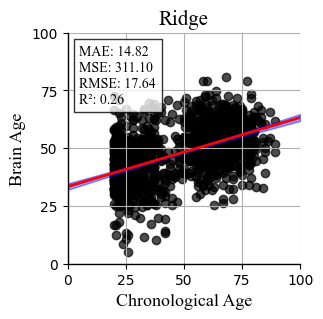

Error medio absoluto: 14.824411387890732
Error cuadrático medio: 311.10116465731204
Raíz del error cuadrático medio: 17.638060116047683
Coeficiente de determinación (R²): 0.2631103454492466


In [11]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [19]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 13075.460431462074
High_subj_spec_RPD_OCC_left: 6086.133304485089
High_subj_spec_EPP_OCC_left: 6086.133304484383
Low_subj_spec_RPD_PARIET_left: 5950.39338347379
Low_subj_spec_EPP_CING_left: 5362.189090168469
Low_subj_spec_RPD_CING_right: 5116.867070265262
Low_subj_spec_RPD_CING_left: 4825.369449195463
Low_subj_spec_EPP_HPC_left: 4701.003872292368
Low_subj_spec_RPD_PARIET_right: 4166.169844995583
Low_subj_spec_EPP_HPC_right: 3957.841404740311
High_subj_spec_RPD_CING_left: 3669.738655859869
High_subj_spec_EPP_CING_left: 3669.7386558482276
Low_subj_spec_EPP_PARIET_left: 3438.6737790951142
Alpha2_canon_EPP_OCC_left: 3073.4758721475987
Alpha2_canon_RPD_OCC_left: 3073.475872137185
IAF_OCC_right: 2954.1796293032053
TF_MFG_right: 2798.916776536624
Alpha2_canon_RPD_HPC_left: 2780.215348322148
Alpha2_canon_EPP_HPC_left: 2780.215348319298
IAF_INS_right: 2773.055283712362
High_subj_spec_RPD_PARIET_right: 245

In [ ]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/multiple_shap_values_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

In [7]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [20]:
shap_summary_sorted_CN

[('Low_subj_spec_RPD_OCC_left', 13075.460431462074),
 ('High_subj_spec_RPD_OCC_left', 6086.133304485089),
 ('High_subj_spec_EPP_OCC_left', 6086.133304484383),
 ('Low_subj_spec_RPD_PARIET_left', 5950.39338347379),
 ('Low_subj_spec_EPP_CING_left', 5362.189090168469),
 ('Low_subj_spec_RPD_CING_right', 5116.867070265262),
 ('Low_subj_spec_RPD_CING_left', 4825.369449195463),
 ('Low_subj_spec_EPP_HPC_left', 4701.003872292368),
 ('Low_subj_spec_RPD_PARIET_right', 4166.169844995583),
 ('Low_subj_spec_EPP_HPC_right', 3957.841404740311),
 ('High_subj_spec_RPD_CING_left', 3669.738655859869),
 ('High_subj_spec_EPP_CING_left', 3669.7386558482276),
 ('Low_subj_spec_EPP_PARIET_left', 3438.6737790951142),
 ('Alpha2_canon_EPP_OCC_left', 3073.4758721475987),
 ('Alpha2_canon_RPD_OCC_left', 3073.475872137185),
 ('IAF_OCC_right', 2954.1796293032053),
 ('TF_MFG_right', 2798.916776536624),
 ('Alpha2_canon_RPD_HPC_left', 2780.215348322148),
 ('Alpha2_canon_EPP_HPC_left', 2780.215348319298),
 ('IAF_INS_right',

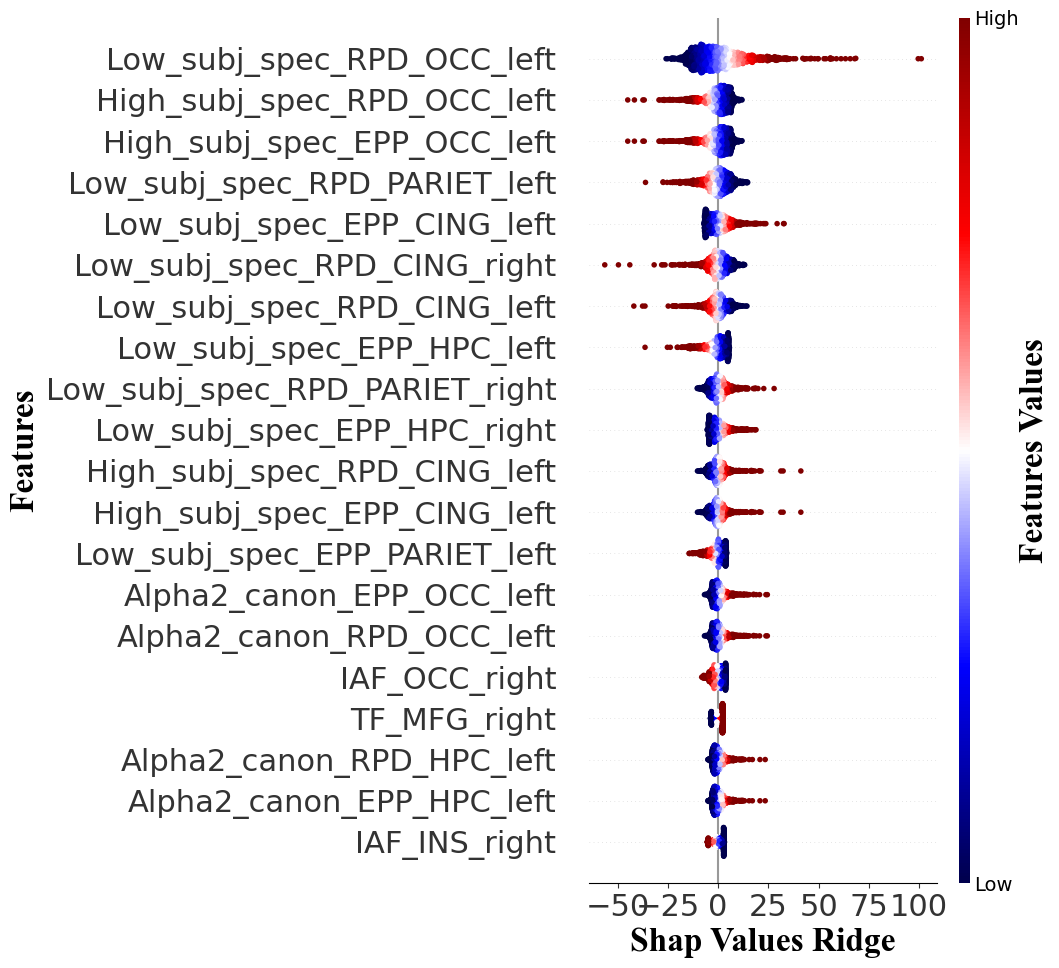

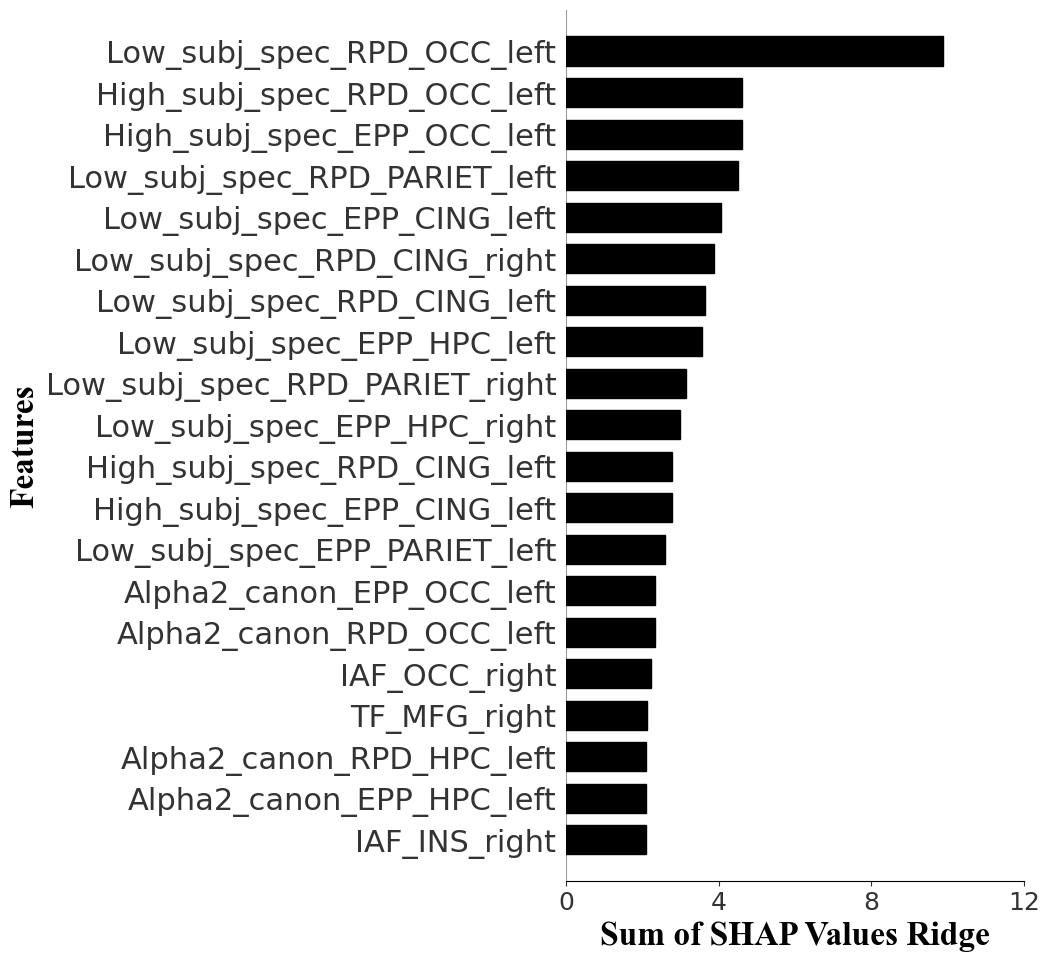

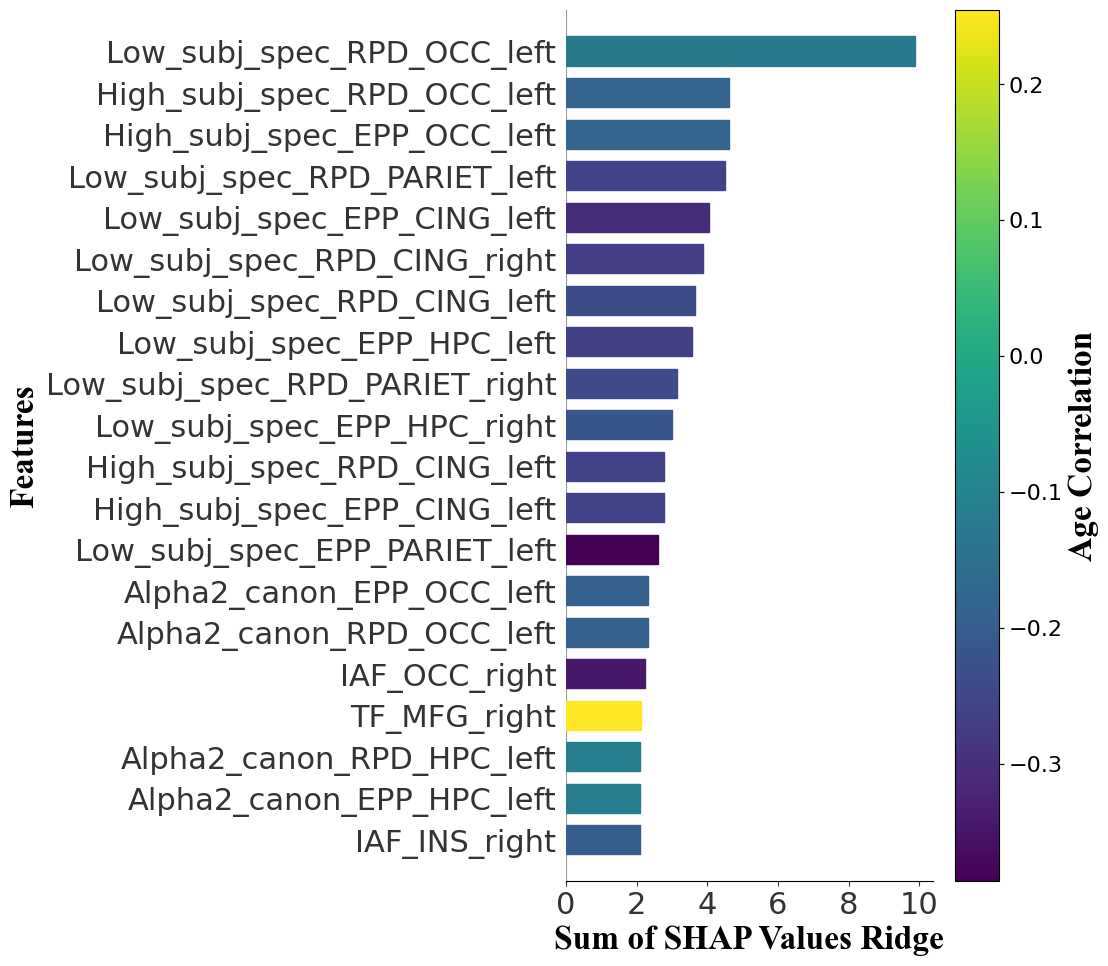

In [21]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [8]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

OCC_left: 1.000000
CING_left: 0.403504
PARIET_left: 0.235680
CING_right: 0.202666
HPC_left: 0.186195
PARIET_right: 0.165012
HPC_right: 0.156760


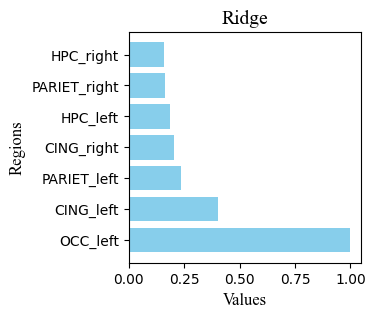

In [9]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


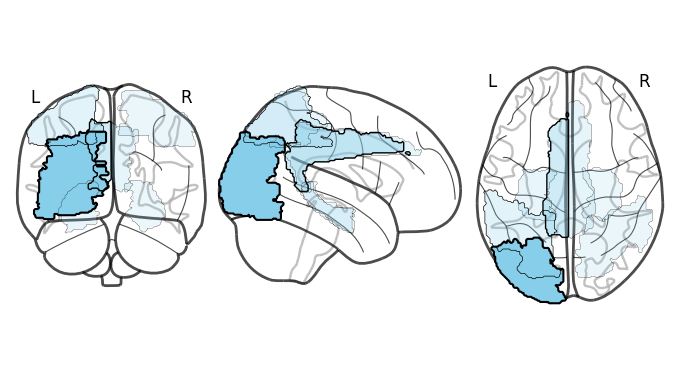

In [10]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)